In [1]:
import pandas as pd
import numpy as np

In [2]:
part_d_df = pd.read_csv('data/part_d_2015.csv', low_memory=False)
exclusion_df = pd.read_csv('data/exclusion_list_2016.csv', low_memory=False)
print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24524894, 21)


In [3]:
part_d_df.head(2)

npi nppes_provider_last_org_name nppes_provider_first_name  \
0  1003000522                      WEIGAND                 FREDERICK   
1  1003000530                     SEMONCHE                    AMANDA   

  nppes_provider_city nppes_provider_state specialty_description  \
0             DELTONA                   FL       Family Practice   
1          QUAKERTOWN                   PA     Internal Medicine   

  description_flag    drug_name generic_name  bene_count  ...  \
0                S  GEMFIBROZIL  GEMFIBROZIL         NaN  ...   
1                S   CLONAZEPAM   CLONAZEPAM         NaN  ...   

   total_30_day_fill_count  total_day_supply  total_drug_cost  \
0                     75.0              2250           581.96   
1                     36.0              1079           205.16   

   bene_count_ge65  bene_count_ge65_suppress_flag total_claim_count_ge65  \
0              NaN                              #                    NaN   
1              NaN                              #                    NaN   

   ge65_suppress_flag total_30_day_fill_count_ge65  total_day_supply_ge65  \
0                   #                          NaN                    NaN   
1                   #                          NaN                    NaN   

   total_drug_cost_ge65  
0                   NaN  
1                   NaN  

[2 rows x 21 columns]

In [4]:
exclusion_df.head(2)
len(exclusion_df)

662

In [5]:
# reorganize data columns
part_d_df = part_d_df[['npi', 'nppes_provider_city','nppes_provider_state', 'specialty_description', 'description_flag',\
                        'drug_name', 'generic_name', 'bene_count', 'total_claim_count','total_day_supply', \
                        'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65', 'total_day_supply_ge65',\
                        'total_drug_cost_ge65']]

# assigning exclusion (False = 0, True = 1)
exclusion_npi = exclusion_df['NPI'].values.tolist()

part_d_df['is_excluded'] = 0
part_d_df.loc[part_d_df['npi'].isin(exclusion_npi), 'is_excluded'] = 1

# get US data to analyze
states = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', \
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', \
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', \
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', \
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',' WY']

part_d_df = part_d_df[part_d_df['nppes_provider_state'].isin(states)]

print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24101572, 16)


In [6]:
len(exclusion_df['NPI'].unique())

661

In [7]:
len(exclusion_df['SPECIALTY'].unique())

66

In [8]:
len(part_d_df.loc[part_d_df['npi'].isin(exclusion_npi)])

6009

In [9]:
part_d_df.loc[part_d_df['is_excluded']==1].head(2)

npi nppes_provider_city nppes_provider_state  \
498805  1023004587           CRESTWOOD                   IL   
498806  1023004587           CRESTWOOD                   IL   

       specialty_description description_flag              drug_name  \
498805     Internal Medicine                S  ACETAMINOPHEN-CODEINE   
498806     Internal Medicine                S          ADVAIR DISKUS   

                      generic_name  bene_count  total_claim_count  \
498805  ACETAMINOPHEN WITH CODEINE        56.0                121   
498806      FLUTICASONE/SALMETEROL         NaN                 30   

        total_day_supply  total_drug_cost  bene_count_ge65  \
498805              3024          1150.45              NaN   
498806               900         10445.31              NaN   

        total_claim_count_ge65  total_day_supply_ge65  total_drug_cost_ge65  \
498805                   104.0                 2598.0               1016.95   
498806                     NaN                    NaN                   NaN   

        is_excluded  
498805            1  
498806            1

In [10]:
# Top 20 states which has the most prescribers
part_d_df_state_count = part_d_df.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_state_count

npi  nppes_provider_city  specialty_description  \
nppes_provider_state                                                        
CA                    2340805              2340805                2340805   
NY                    1668873              1668873                1668873   
FL                    1643021              1643021                1643021   
TX                    1500581              1500581                1500581   
PA                    1241115              1241115                1241115   
OH                    1017468              1017468                1017468   
IL                     886988               886988                 886988   
NC                     884260               884260                 884260   
MI                     841699               841699                 841699   
GA                     687089               687089                 687089   
NJ                     656338               656338                 656338   
TN                     647158               647158                 647158   
MA                     571154               571154                 571154   
MO                     558314               558314                 558314   
IN                     545866               545866                 545866   
VA                     540852               540852                 540852   
WA                     468188               468188                 468188   
WI                     465153               465153                 465153   
KY                     460924               460924                 460924   
AZ                     433619               433619                 433619   

                      description_flag  drug_name  generic_name  bene_count  \
nppes_provider_state                                                          
CA                             2340805    2340805       2340805      924913   
NY                             1668873    1668873       1668873      613571   
FL                             1643021    1643021       1643021      725288   
TX                             1500581    1500581       1500581      627212   
PA                             1241115    1241115       1241115      451919   
OH                             1017468    1017468       1017468      403640   
IL                              886988     886988        886988      320552   
NC                              884260     884260        884260      341284   
MI                              841699     841699        841699      346279   
GA                              687089     687089        687089      286704   
NJ                              656338     656338        656338      245444   
TN                              647158     647158        647158      269914   
MA                              571154     571154        571154      189019   
MO                              558314     558314        558314      211726   
IN                              545866     545866        545866      212885   
VA                              540852     540852        540852      202839   
WA                              468188     468188        468188      158560   
WI                              465153     465153        465153      163661   
KY                              460924     460924        460924      186168   
AZ                              433619     433619        433619      182246   

                      total_claim_count  total_day_supply  total_drug_cost  \
nppes_provider_state                                                         
CA                              2340805           2340805          2340805   
NY                              1668873           1668873          1668873   
FL                              1643021           1643021          1643021   
TX                              1500581           1500581          1500581   
PA                              1241115           1241115          1241115   
OH                              1017468       

In [11]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

npi  nppes_provider_city  nppes_provider_state  \
is_excluded                                                        
0            24095563             24095563              24095563   
1                6009                 6009                  6009   

             specialty_description  description_flag  drug_name  generic_name  \
is_excluded                                                                     
0                         24095563          24095563   24095563      24095563   
1                             6009              6009       6009          6009   

             bene_count  total_claim_count  total_day_supply  total_drug_cost  \
is_excluded                                                                     
0               9286756           24095563          24095563         24095563   
1                  2272               6009              6009             6009   

             bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
is_excluded                                                                   
0                    3337986                13898619               13898619   
1                        928                    3424                   3424   

             total_drug_cost_ge65  
is_excluded                        
0                        13898619  
1                            3424

In [12]:
# export exclusion providers data to do statistics analysis, run once when needed by uncommenting two lines below
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
#part_d_df_exclusion.to_csv('exclusion2017.csv')

In [13]:
len(part_d_df_exclusion['npi'].unique())

150

In [14]:
part_d_df_exclusion[['npi']].to_csv('2015_part_d_e_npi.csv')

In [14]:
len(part_d_df_exclusion['drug_name'].unique())

628

In [15]:
len(part_d_df_exclusion['specialty_description'].unique())

27

In [16]:
part_d_df_exclusion['specialty_description'].unique()

array(['Internal Medicine', 'Family Practice', 'Emergency Medicine',
       'Psychiatry & Neurology', 'Physician Assistant', 'Dentist',
       'Nurse Practitioner', 'General Practice', 'Podiatry',
       'Obstetrics/Gynecology', 'Pain Management', 'General Surgery',
       'Physical Medicine and Rehabilitation', 'Optometry', 'Psychiatry',
       'Dermatology', 'Gastroenterology', 'Pulmonary Disease',
       'Geriatric Medicine', 'Osteopathic Manipulative Medicine',
       'Anesthesiology', 'Specialist', 'Interventional Pain Management',
       'Medical Genetics, Ph.D. Medical Genetics', 'Neurology',
       'Neuropsychiatry', 'Naturopath'], dtype=object)

In [17]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_exclusion_npi_count = part_d_df_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_exclusion_npi_count.reset_index(level=["npi"], inplace=True)
part_d_df_exclusion_npi_count

npi  nppes_provider_city  nppes_provider_state  \
0  1588694343                  250                   250   
1  1578524237                  218                   218   
2  1245246925                  211                   211   
3  1083681423                  203                   203   
4  1578754362                  199                   199   
5  1093851164                  198                   198   
6  1871571406                  195                   195   
7  1598713430                  192                   192   
8  1659703734                  173                   173   
9  1891703997                  162                   162   

   specialty_description  description_flag  drug_name  generic_name  \
0                    250               250        250           250   
1                    218               218        218           218   
2                    211               211        211           211   
3                    203               203        203           203   
4                    199               199        199           199   
5                    198               198        198           198   
6                    195               195        195           195   
7                    192               192        192           192   
8                    173               173        173           173   
9                    162               162        162           162   

   bene_count  total_claim_count  total_day_supply  total_drug_cost  \
0         105                250               250              250   
1          94                218               218              218   
2          81                211               211              211   
3          73                203               203              203   
4          76                199               199              199   
5          71                198               198              198   
6         134                195               195              195   
7         117                192               192              192   
8          84                173               173              173   
9          53                162               162              162   

   bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
0               58                     195                    195   
1               34                     143                    143   
2               52                     143                    143   
3               31                     136                    136   
4               16                     133                    133   
5               18                     123                    123   
6               48                     127                    127   
7               52                      92                     92   
8               40                      97                     97   
9               10                      97                     97   

   total_drug_cost_ge65  is_excluded  
0                   195          250  
1                   143          218  
2                   143          211  
3                   136          203  
4                   133          199  
5                   123          198  
6                   127          195  
7                    92          192  
8                    97          173  
9                    97          162

In [18]:
# Top 20 states which has the most excluded prescribers
part_d_df_exclusion_state_count = part_d_df_exclusion.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_state_count.reset_index(level=["nppes_provider_state"], inplace=True)
part_d_df_exclusion_state_count

nppes_provider_state  npi  nppes_provider_city  specialty_description  \
0                    IL  980                  980                    980   
1                    CA  663                  663                    663   
2                    MI  501                  501                    501   
3                    TX  460                  460                    460   
4                    FL  400                  400                    400   
5                    NY  378                  378                    378   
6                    AL  375                  375                    375   
7                    NJ  360                  360                    360   
8                    NM  284                  284                    284   
9                    KY  242                  242                    242   
10                   NC  203                  203                    203   
11                   VA  175                  175                    175   
12                   WA  163                  163                    163   
13                   NV  153                  153                    153   
14                   UT  118                  118                    118   
15                   MO  116                  116                    116   
16                   WV   65                   65                     65   
17                   TN   58                   58                     58   
18                   MA   57                   57                     57   
19                   OH   44                   44                     44   

    description_flag  drug_name  generic_name  bene_count  total_claim_count  \
0                980        980           980         378                980   
1                663        663           663         229                663   
2                501        501           501         240                501   
3                460        460           460         169                460   
4                400        400           400         145                400   
5                378        378           378         135                378   
6                375        375           375         114                375   
7                360        360           360         131                360   
8                284        284           284         157                284   
9                242        242           242         107                242   
10               203        203           203          73                203   
11               175        175           175          84                175   
12               163        163           163          53                163   
13               153        153           153          66                153   
14               118        118           118          36                118   
15               116        116           116          34                116   
16                65         65            65          18                 65   
17                58         58            58          16                 58   
18                57         57            57           2                 57   
19                44         44            44          11                 44   

    total_day_supply  total_drug_cost  bene_count_ge65  \
0                980              980              174   
1                663              663               85   
2                501              501               96   
3                460              460              101   
4                400              400               45   
5                378              378               40   
6                375              375               56   
7                360              360               26   
8                284              284               53   
9                242              242               44   
10               203              203               31   
11               175         

In [19]:
# Top 20 specialties which has the most excluded prescribers
part_d_df_exclusion_specialty_count = part_d_df_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_exclusion_specialty_count

specialty_description   npi  nppes_provider_city  \
0                      Internal Medicine  2553                 2553   
1                        Family Practice  1674                 1674   
2                     Nurse Practitioner   283                  283   
3   Physical Medicine and Rehabilitation   222                  222   
4                     Geriatric Medicine   218                  218   
5                       General Practice   153                  153   
6                 Psychiatry & Neurology   151                  151   
7                             Psychiatry   131                  131   
8                        General Surgery    84                   84   
9                    Physician Assistant    72                   72   
10                     Pulmonary Disease    55                   55   
11                           Dermatology    54                   54   
12                            Specialist    51                   51   
13                       Pain Management    47                   47   
14                    Emergency Medicine    45                   45   
15                      Gastroenterology    45                   45   
16                             Neurology    44                   44   
17                        Anesthesiology    39                   39   
18                 Obstetrics/Gynecology    22                   22   
19                       Neuropsychiatry    21                   21   

    nppes_provider_state  description_flag  drug_name  generic_name  \
0                   2553              2553       2553          2553   
1                   1674              1674       1674          1674   
2                    283               283        283           283   
3                    222               222        222           222   
4                    218               218        218           218   
5                    153               153        153           153   
6                    151               151        151           151   
7                    131               131        131           131   
8                     84                84         84            84   
9                     72                72         72            72   
10                    55                55         55            55   
11                    54                54         54            54   
12                    51                51         51            51   
13                    47                47         47            47   
14                    45                45         45            45   
15                    45                45         45            45   
16                    44                44         44            44   
17                    39                39         39            39   
18                    22                22         22            22   
19                    21                21         21            21   

    bene_count  total_claim_count  total_day_supply  total_drug_cost  \
0         1013               2553              2553             2553   
1          571               1674              1674             1674   
2          123                283               283              283   
3          126                222               222              222   
4           80                218               218              218   
5           31                153               153              153   
6           61                151               151              151   
7           33                131               131              131   
8           26                 84                84               84   
9           18                 72                72               72   
10          13                 55                55               55   
11          36                 54                54               54   
12           9                 51                51               51   
13          28             

After full US dataset analysis, will use NJ data to do detailed analysis

In [19]:
part_d_df_small=part_d_df[part_d_df['nppes_provider_state']=='NJ']

In [20]:
len(part_d_df_small)

656338

In [21]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df_small.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

npi  nppes_provider_city  nppes_provider_state  \
is_excluded                                                      
0            655978               655978                655978   
1               360                  360                   360   

             specialty_description  description_flag  drug_name  generic_name  \
is_excluded                                                                     
0                           655978            655978     655978        655978   
1                              360               360        360           360   

             bene_count  total_claim_count  total_day_supply  total_drug_cost  \
is_excluded                                                                     
0                245313             655978            655978           655978   
1                   131                360               360              360   

             bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
is_excluded                                                                   
0                      92906                  393154                 393154   
1                         26                     170                    170   

             total_drug_cost_ge65  
is_excluded                        
0                          393154  
1                             170

In [22]:
# Top specialties which has the most excluded prescribers in small dataset
part_d_df_small_exclusion = part_d_df_small[part_d_df_small['is_excluded'] == 1]
part_d_df_small_exclusion_specialty_count = part_d_df_small_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_small_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_small_exclusion_specialty_count

specialty_description  npi  nppes_provider_city  nppes_provider_state  \
0     Internal Medicine  261                  261                   261   
1       General Surgery   83                   83                    83   
2       Family Practice   15                   15                    15   
3               Dentist    1                    1                     1   

   description_flag  drug_name  generic_name  bene_count  total_claim_count  \
0               261        261           261         100                261   
1                83         83            83          25                 83   
2                15         15            15           6                 15   
3                 1          1             1           0                  1   

   total_day_supply  total_drug_cost  bene_count_ge65  total_claim_count_ge65  \
0               261              261               21                     125   
1                83               83                4                      36   
2                15               15                1                       8   
3                 1                1                0                       1   

   total_day_supply_ge65  total_drug_cost_ge65  is_excluded  
0                    125                   125          261  
1                     36                    36           83  
2                      8                     8           15  
3                      1                     1            1

In [23]:
# add a new field called drug_count to the dataframe
part_d_df_small["drug_count"] = 1

# use the groupby() and agg() methods to create a new dataframe. use numpy sum method to populate values
prescriber_specialty_df = part_d_df_small.groupby(["npi","specialty_description"]).agg({"total_claim_count": np.sum,  "drug_count": np.sum})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
prescriber_specialty_df.head()

total_claim_count  drug_count
npi        specialty_description                               
1003002072 Urology                             1526          20
1003002858 Nurse Practitioner                  1927          41
1003011891 Gastroenterology                     454          19
1003012410 Family Practice                      764          39
1003019910 Dentist                              283           5

In [25]:
# to merge the tables we need to flatten the indices.
prescriber_specialty_df.reset_index(level=["npi","specialty_description"], inplace=True)

In [26]:
prescriber_specialty_df.head()

npi specialty_description  total_claim_count  drug_count
0  1003002072               Urology               1526          20
1  1003002858    Nurse Practitioner               1927          41
2  1003011891      Gastroenterology                454          19
3  1003012410       Family Practice                764          39
4  1003019910               Dentist                283           5

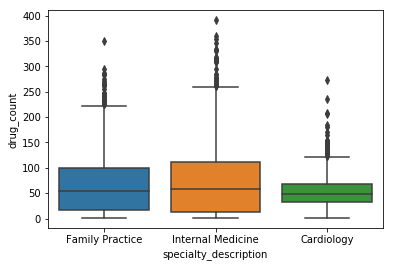

In [27]:
# show that different medical specialties prescribe different numbers of drugs
import seaborn as sb
%matplotlib inline

sb.boxplot(x="specialty_description", y="drug_count", 
           data=prescriber_specialty_df
           [
           (prescriber_specialty_df["specialty_description"] == "Internal Medicine") |
           (prescriber_specialty_df["specialty_description"] == "Family Practice") |
           (prescriber_specialty_df["specialty_description"] == "Cardiology")
           ]
          )

In [28]:
# User pandas crosstab function to create a dataframe where each row is a prescriber identified by their NPI, 
# the columns are the drug generic names, the values are the sum of total_claim_count
npi_generic_cross_df = pd.crosstab(part_d_df_small["npi"], part_d_df_small["generic_name"], values=part_d_df_small["total_claim_count"], 
                                  aggfunc=np.sum)

In [29]:
# To replace the NaN (not a number) from the cells with zero the fillna() method is used.
npi_generic_cross_df = npi_generic_cross_df.fillna(0)

In [30]:
npi_generic_cross_df.head()

generic_name  0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  \
npi                                                     
1003002072                      0.0               0.0   
1003002858                      0.0               0.0   
1003011891                      0.0               0.0   
1003012410                      0.0               0.0   
1003019910                      0.0               0.0   

generic_name  ABACAVIR SULFATE/LAMIVUDINE  ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  \
npi                                                                         
1003002072                            0.0                             0.0   
1003002858                            0.0                             0.0   
1003011891                            0.0                             0.0   
1003012410                            0.0                             0.0   
1003019910                            0.0                             0.0   

generic_name  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  ABATACEPT/MALTOSE  \
npi                                                                          
1003002072                               0.0        0.0                0.0   
1003002858                               0.0        0.0                0.0   
1003011891                               0.0        0.0                0.0   
1003012410                               0.0        0.0                0.0   
1003019910                               0.0        0.0                0.0   

generic_name  ABIRATERONE ACETATE  ACAMPROSATE CALCIUM  ACARBOSE  ...  \
npi                                                               ...   
1003002072                    0.0                  0.0       0.0  ...   
1003002858                    0.0                  0.0       0.0  ...   
1003011891                    0.0                  0.0       0.0  ...   
1003012410                    0.0                  0.0       0.0  ...   
1003019910                    0.0                  0.0       0.0  ...   

generic_name  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  ZIPRASIDONE MESYLATE  \
npi                                                                         
1003002072           0.0       0.0              0.0                   0.0   
1003002858           0.0       0.0              0.0                   0.0   
1003011891           0.0       0.0              0.0                   0.0   
1003012410           0.0       0.0              0.0                   0.0   
1003019910           0.0       0.0              0.0                   0.0   

generic_name  ZOLEDRONIC ACID  ZOLEDRONIC ACID/MANNITOL&WATER  ZOLMITRIPTAN  \
npi                                                                           
1003002072                0.0                             0.0           0.0   
1003002858                0.0                             0.0           0.0   
1003011891                0.0                             0.0           0.0   
1003012410                0.0                             0.0           0.0   
1003019910                0.0                             0.0           0.0   

generic_name  ZOLPIDEM TARTRATE  ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
npi                                                                  
1003002072                  0.0         0.0                     0.0  
1003002858                  0.0         0.0                     0.0  
1003011891                  0.0         0.0                     0.0  
1003012410                  0.0         0.0                     0.0  
1003019910                  0.0         0.0                     0.0  

[5 rows x 1187 columns]

In [31]:
# use npi to merge two tables prescriber_specialty_df and npi_generic_cross_df
prescriber_specialty_generic_df = pd.merge(prescriber_specialty_df, npi_generic_cross_df.reset_index(level=["npi"]), on="npi")

In [32]:
prescriber_specialty_generic_df.head()

npi specialty_description  total_claim_count  drug_count  \
0  1003002072               Urology               1526          20   
1  1003002858    Nurse Practitioner               1927          41   
2  1003011891      Gastroenterology                454          19   
3  1003012410       Family Practice                764          39   
4  1003019910               Dentist                283           5   

   0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  ABACAVIR SULFATE/LAMIVUDINE  \
0                    0.0               0.0                          0.0   
1                    0.0               0.0                          0.0   
2                    0.0               0.0                          0.0   
3                    0.0               0.0                          0.0   
4                    0.0               0.0                          0.0   

   ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  \
0                             0.0                             0.0        0.0   
1                             0.0                             0.0        0.0   
2                             0.0                             0.0        0.0   
3                             0.0                             0.0        0.0   
4                             0.0                             0.0        0.0   

   ...  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  ZIPRASIDONE MESYLATE  \
0  ...         0.0       0.0              0.0                   0.0   
1  ...         0.0       0.0              0.0                   0.0   
2  ...         0.0       0.0              0.0                   0.0   
3  ...         0.0       0.0              0.0                   0.0   
4  ...         0.0       0.0              0.0                   0.0   

   ZOLEDRONIC ACID  ZOLEDRONIC ACID/MANNITOL&WATER  ZOLMITRIPTAN  \
0              0.0                             0.0           0.0   
1              0.0                             0.0           0.0   
2              0.0                             0.0           0.0   
3              0.0                             0.0           0.0   
4              0.0                             0.0           0.0   

   ZOLPIDEM TARTRATE  ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
0                0.0         0.0                     0.0  
1                0.0         0.0                     0.0  
2                0.0         0.0                     0.0  
3                0.0         0.0                     0.0  
4                0.0         0.0                     0.0  

[5 rows x 1191 columns]

In [33]:
prescriber_specialty_generic_df = prescriber_specialty_generic_df.sort_values(by=["specialty_description", "npi"])

In [34]:
prescriber_specialty_generic_df.head()

npi specialty_description  total_claim_count  drug_count  \
1609   1063624823    Addiction Medicine                 13           1   
15222  1639295470    Addiction Medicine                114           7   
19354  1801833520    Addiction Medicine                 14           1   
145    1003878943    Allergy/Immunology                 85           5   
432    1013919141    Allergy/Immunology                 27           1   

       0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  ABACAVIR SULFATE/LAMIVUDINE  \
1609                     0.0               0.0                          0.0   
15222                    0.0               0.0                          0.0   
19354                    0.0               0.0                          0.0   
145                      0.0               0.0                          0.0   
432                      0.0               0.0                          0.0   

       ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  \
1609                              0.0                             0.0   
15222                             0.0                             0.0   
19354                             0.0                             0.0   
145                               0.0                             0.0   
432                               0.0                             0.0   

       ABATACEPT  ...  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  \
1609         0.0  ...         0.0       0.0              0.0   
15222        0.0  ...         0.0       0.0              0.0   
19354        0.0  ...         0.0       0.0              0.0   
145          0.0  ...         0.0       0.0              0.0   
432          0.0  ...         0.0       0.0              0.0   

       ZIPRASIDONE MESYLATE  ZOLEDRONIC ACID  ZOLEDRONIC ACID/MANNITOL&WATER  \
1609                    0.0              0.0                             0.0   
15222                   0.0              0.0                             0.0   
19354                   0.0              0.0                             0.0   
145                     0.0              0.0                             0.0   
432                     0.0              0.0                             0.0   

       ZOLMITRIPTAN  ZOLPIDEM TARTRATE  ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
1609            0.0                0.0         0.0                     0.0  
15222           0.0                0.0         0.0                     0.0  
19354           0.0                0.0         0.0                     0.0  
145             0.0                0.0         0.0                     0.0  
432             0.0                0.0         0.0                     0.0  

[5 rows x 1191 columns]

In [35]:
# Since the data has been resorted by specialty_desc and npi, index needs to be updated to reflect new order of data
prescriber_specialty_generic_df=prescriber_specialty_generic_df.reset_index(drop=True)
prescriber_specialty_generic_df.head()

npi specialty_description  total_claim_count  drug_count  \
0  1063624823    Addiction Medicine                 13           1   
1  1639295470    Addiction Medicine                114           7   
2  1801833520    Addiction Medicine                 14           1   
3  1003878943    Allergy/Immunology                 85           5   
4  1013919141    Allergy/Immunology                 27           1   

   0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  ABACAVIR SULFATE/LAMIVUDINE  \
0                    0.0               0.0                          0.0   
1                    0.0               0.0                          0.0   
2                    0.0               0.0                          0.0   
3                    0.0               0.0                          0.0   
4                    0.0               0.0                          0.0   

   ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  \
0                             0.0                             0.0        0.0   
1                             0.0                             0.0        0.0   
2                             0.0                             0.0        0.0   
3                             0.0                             0.0        0.0   
4                             0.0                             0.0        0.0   

   ...  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  ZIPRASIDONE MESYLATE  \
0  ...         0.0       0.0              0.0                   0.0   
1  ...         0.0       0.0              0.0                   0.0   
2  ...         0.0       0.0              0.0                   0.0   
3  ...         0.0       0.0              0.0                   0.0   
4  ...         0.0       0.0              0.0                   0.0   

   ZOLEDRONIC ACID  ZOLEDRONIC ACID/MANNITOL&WATER  ZOLMITRIPTAN  \
0              0.0                             0.0           0.0   
1              0.0                             0.0           0.0   
2              0.0                             0.0           0.0   
3              0.0                             0.0           0.0   
4              0.0                             0.0           0.0   

   ZOLPIDEM TARTRATE  ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
0                0.0         0.0                     0.0  
1                0.0         0.0                     0.0  
2                0.0         0.0                     0.0  
3                0.0         0.0                     0.0  
4                0.0         0.0                     0.0  

[5 rows x 1191 columns]

In [36]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_small_exclusion_npi_count = part_d_df_small_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_small_exclusion_npi_count

nppes_provider_city  nppes_provider_state  specialty_description  \
npi                                                                            
1609829985                   99                    99                     99   
1043257744                   88                    88                     88   
1912069394                   83                    83                     83   
1922032770                   49                    49                     49   
1548278930                   25                    25                     25   
1831151356                   15                    15                     15   
1134106511                    1                     1                      1   

            description_flag  drug_name  generic_name  bene_count  \
npi                                                                 
1609829985                99         99            99          42   
1043257744                88         88            88          38   
1912069394                83         83            83          25   
1922032770                49         49            49          15   
1548278930                25         25            25           5   
1831151356                15         15            15           6   
1134106511                 1          1             1           0   

            total_claim_count  total_day_supply  total_drug_cost  \
npi                                                                
1609829985                 99                99               99   
1043257744                 88                88               88   
1912069394                 83                83               83   
1922032770                 49                49               49   
1548278930                 25                25               25   
1831151356                 15                15               15   
1134106511                  1                 1                1   

            bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
npi                                                                          
1609829985               10                      46                     46   
1043257744                7                      36                     36   
1912069394                4                      36                     36   
1922032770                2                      30                     30   
1548278930                2                      13                     13   
1831151356                1                       8                      8   
1134106511                0                       1                      1   

            total_drug_cost_ge65  is_excluded  
npi                                            
1609829985                    46           99  
1043257744                    36           88  
1912069394                    36           83  
1922032770                    30           49  
1548278930                    13           25  
1831151356                     8           15  
1134106511                     1            1

In [62]:
# Based on analyzed result, the interested excluded npi is 1609829985
# we need to find out the position of 1609829985 based on this script, the result is 11787
# update the position of the rest of the scripts using 11787
prescriber_specialty_generic_df.loc[prescriber_specialty_generic_df['npi'] == 1831151356]

npi specialty_description  total_claim_count  drug_count  \
7745  1831151356       Family Practice                302          15   

      0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  ABACAVIR SULFATE/LAMIVUDINE  \
7745                    0.0               0.0                          0.0   

      ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  \
7745                             0.0                             0.0   

      ABATACEPT  ...  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  \
7745        0.0  ...         0.0       0.0              0.0   

      ZIPRASIDONE MESYLATE  ZOLEDRONIC ACID  ZOLEDRONIC ACID/MANNITOL&WATER  \
7745                   0.0              0.0                             0.0   

      ZOLMITRIPTAN  ZOLPIDEM TARTRATE  ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
7745           0.0                0.0         0.0                     0.0  

[1 rows x 1191 columns]

In [38]:
#part_d_df_small_exclusion[part_d_df_small_exclusion['specialty_description'] == 'Family Practice']

In [63]:
part_d_df_exclusion.loc[part_d_df_exclusion['npi'] == 1831151356].head()

npi nppes_provider_city nppes_provider_state  \
20409558  1831151356           HAWTHORNE                   NJ   
20409559  1831151356           HAWTHORNE                   NJ   
20409560  1831151356           HAWTHORNE                   NJ   
20409561  1831151356           HAWTHORNE                   NJ   
20409562  1831151356           HAWTHORNE                   NJ   

         specialty_description description_flag             drug_name  \
20409558       Family Practice                S           ALLOPURINOL   
20409559       Family Practice                S   AMLODIPINE BESYLATE   
20409560       Family Practice                S  ATORVASTATIN CALCIUM   
20409561       Family Practice                S          BUPROPION XL   
20409562       Family Practice                S                CIALIS   

                  generic_name  bene_count  total_claim_count  \
20409558           ALLOPURINOL         NaN                 12   
20409559   AMLODIPINE BESYLATE        23.0                 39   
20409560  ATORVASTATIN CALCIUM        30.0                 48   
20409561         BUPROPION HCL         NaN                 11   
20409562             TADALAFIL         NaN                 12   

          total_day_supply  total_drug_cost  bene_count_ge65  \
20409558               720           314.91              NaN   
20409559              3240           318.61              NaN   
20409560              3720           946.63              NaN   
20409561               630           529.22              NaN   
20409562               360          2516.80              NaN   

          total_claim_count_ge65  total_day_supply_ge65  total_drug_cost_ge65  \
20409558                    12.0                  720.0                314.91   
20409559                     NaN                    NaN                   NaN   
20409560                     NaN                    NaN                   NaN   
20409561                     NaN                    NaN                   NaN   
20409562                    12.0                  360.0               2516.80   

          is_excluded  
20409558            1  
20409559            1  
20409560            1  
20409561            1  
20409562            1

Shift from using the Pandas dataframe object to the `numpy.array`. Slice off the columns that are not related to the number of filled prescriptions and convert this to a matrix. The `iloc()` method slices a dataframe by the column and the method `as_matrix()` converts the dataframe into a numpy array.

In [64]:
pf_matrix = prescriber_specialty_generic_df.iloc[: , 4: ].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [65]:
pf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
identifiers_matrix = prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [67]:
generic_array = prescriber_specialty_generic_df.columns[4:]

In [68]:
generic_array

Index(['0.9 % SODIUM CHLORIDE', 'ABACAVIR SULFATE',
       'ABACAVIR SULFATE/LAMIVUDINE', 'ABACAVIR/DOLUTEGRAVIR/LAMIVUDI',
       'ABACAVIR/LAMIVUDINE/ZIDOVUDINE', 'ABATACEPT', 'ABATACEPT/MALTOSE',
       'ABIRATERONE ACETATE', 'ACAMPROSATE CALCIUM', 'ACARBOSE',
       ...
       'ZIDOVUDINE', 'ZILEUTON', 'ZIPRASIDONE HCL', 'ZIPRASIDONE MESYLATE',
       'ZOLEDRONIC ACID', 'ZOLEDRONIC ACID/MANNITOL&WATER', 'ZOLMITRIPTAN',
       'ZOLPIDEM TARTRATE', 'ZONISAMIDE', 'ZOSTER VACCINE LIVE/PF'],
      dtype='object', length=1187)

In [45]:
# to compute the distance between a vector representing the drugs that a prescriber prescribes 
# we need to import the scipy.spatial library.
import scipy.spatial

Normalize the claim count of prescriptions by the total number of claims for the prescriber. Each entry now represent the percentage of total claims that are associated with the prescriber.

In [69]:
np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

array([[ 13.],
       [114.],
       [ 14.],
       ...,
       [ 42.],
       [186.],
       [280.]])

In [70]:
normalized_pf_matrix = pf_matrix / np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

In [71]:
normalized_pf_matrix.shape

(24089, 1187)

Use the euclidean distance to compute the distance between two prescribers. The results of the pdist() function need to be placed into square form. 

In [72]:
prescriber_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalized_pf_matrix, "euclidean"))

In [73]:
prescriber_dist.shape

(24089, 24089)

As we have sorted the prescribers by their specialty then we expect to see some spatial patterns in the distance matrix. A matrix can be visualized using the `matplotlib` library.

In [74]:
import matplotlib.pyplot as plt

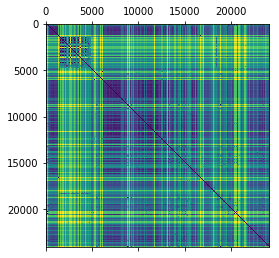

In [75]:
plt.matshow(prescriber_dist)

In [76]:
prescriber_specialty_generic_df.iloc[7745,0:4]

npi                           1831151356
specialty_description    Family Practice
total_claim_count                    302
drug_count                            15
Name: 7745, dtype: object

In [77]:
# The prescriber referenced at position 17368 is an Internal Medicine. 
# We can now calculate the prescribers most similar to this Internal Medicine.
prescriber_dist[7745,:]

array([1.04217876, 0.48966543, 1.04217876, ..., 0.82339135, 0.64314157,
       0.53648881])

In [78]:
# plotting the distances we can see that prescribers most like are probably also Internal Medicine.
#plt.scatter(np.arange(prescriber_dist.shape[0]),prescriber_dist[7745,:])

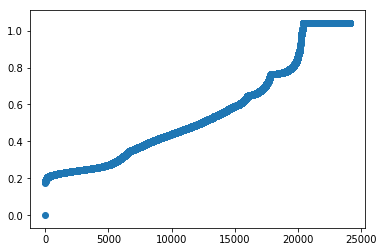

In [79]:
plt.scatter(np.arange(prescriber_dist.shape[0]),np.sort(prescriber_dist[7745,:]))

In [80]:
providers_sorted = np.lexsort((prescriber_dist[:,7745].tolist(),))

In [81]:
prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()[providers_sorted[0:40],:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1831151356, 'Family Practice'],
       [1164498606, 'Family Practice'],
       [1093704934, 'Internal Medicine'],
       [1669473898, 'Internal Medicine'],
       [1609865955, 'Internal Medicine'],
       [1982794707, 'Internal Medicine'],
       [1497721112, 'Internal Medicine'],
       [1033215892, 'Internal Medicine'],
       [1295765188, 'Internal Medicine'],
       [1831192129, 'Internal Medicine'],
       [1952480063, 'Internal Medicine'],
       [1518920461, 'Internal Medicine'],
       [1386694891, 'Internal Medicine'],
       [1124266366, 'Internal Medicine'],
       [1215026554, 'Internal Medicine'],
       [1770575037, 'Internal Medicine'],
       [1447349162, 'Internal Medicine'],
       [1942399365, 'Internal Medicine'],
       [1659376713, 'Internal Medicine'],
       [1780682492, 'Internal Medicine'],
       [1639173008, 'Family Practice'],
       [1972561926, 'Internal Medicine'],
       [1841274370, 'Internal Medicine'],
       [1437154192, 'Internal Medicine']

In [82]:
np.lexsort(((-1 * pf_matrix[7745,:]).tolist(),))[0:17]

array([  89,   58,  634,  576,  715,  745, 1014,  648,  962, 1065,   38,
       1061,  150,  649,  689,    0,    1], dtype=int64)

In [83]:
generic_array[np.lexsort(((-1 * pf_matrix[7745,:]).tolist(),))][0:16]

Index(['ATORVASTATIN CALCIUM', 'AMLODIPINE BESYLATE', 'LEVOTHYROXINE SODIUM',
       'INSULIN GLARGINE,HUM.REC.ANLOG', 'METOPROLOL SUCCINATE', 'MUPIROCIN',
       'SIMVASTATIN', 'LISINOPRIL', 'RAMIPRIL', 'TAMSULOSIN HCL',
       'ALLOPURINOL', 'TADALAFIL', 'BUPROPION HCL',
       'LISINOPRIL/HYDROCHLOROTHIAZIDE', 'METFORMIN HCL',
       '0.9 % SODIUM CHLORIDE'],
      dtype='object')

In [84]:
part_d_df_small[part_d_df_small["npi"]==1831151356].sort_values("total_claim_count", ascending=False)

npi nppes_provider_city nppes_provider_state  \
20409560  1831151356           HAWTHORNE                   NJ   
20409559  1831151356           HAWTHORNE                   NJ   
20409564  1831151356           HAWTHORNE                   NJ   
20409563  1831151356           HAWTHORNE                   NJ   
20409568  1831151356           HAWTHORNE                   NJ   
20409569  1831151356           HAWTHORNE                   NJ   
20409572  1831151356           HAWTHORNE                   NJ   
20409565  1831151356           HAWTHORNE                   NJ   
20409571  1831151356           HAWTHORNE                   NJ   
20409573  1831151356           HAWTHORNE                   NJ   
20409558  1831151356           HAWTHORNE                   NJ   
20409562  1831151356           HAWTHORNE                   NJ   
20409561  1831151356           HAWTHORNE                   NJ   
20409566  1831151356           HAWTHORNE                   NJ   
20409567  1831151356           HAWTHORNE                   NJ   

         specialty_description description_flag  \
20409560       Family Practice                S   
20409559       Family Practice                S   
20409564       Family Practice                S   
20409563       Family Practice                S   
20409568       Family Practice                S   
20409569       Family Practice                S   
20409572       Family Practice                S   
20409565       Family Practice                S   
20409571       Family Practice                S   
20409573       Family Practice                S   
20409558       Family Practice                S   
20409562       Family Practice                S   
20409561       Family Practice                S   
20409566       Family Practice                S   
20409567       Family Practice                S   

                               drug_name                    generic_name  \
20409560            ATORVASTATIN CALCIUM            ATORVASTATIN CALCIUM   
20409559             AMLODIPINE BESYLATE             AMLODIPINE BESYLATE   
20409564            LEVOTHYROXINE SODIUM            LEVOTHYROXINE SODIUM   
20409563                 LANTUS SOLOSTAR  INSULIN GLARGINE,HUM.REC.ANLOG   
20409568            METOPROLOL SUCCINATE            METOPROLOL SUCCINATE   
20409569                       MUPIROCIN                       MUPIROCIN   
20409572                     SIMVASTATIN                     SIMVASTATIN   
20409565                      LISINOPRIL                      LISINOPRIL   
20409571                        RAMIPRIL                        RAMIPRIL   
20409573                  TAMSULOSIN HCL                  TAMSULOSIN HCL   
20409558                     ALLOPURINOL                     ALLOPURINOL   
20409562                          CIALIS                       TADALAFIL   
20409561                    BUPROPION XL                   BUPROPION HCL   
20409566  LISINOPRIL-HYDROCHLOROTHIAZIDE  LISINOPRIL/HYDROCHLOROTHIAZIDE   
20409567                   METFORMIN HCL                   METFORMIN HCL   

          bene_count  total_claim_count  total_day_supply  total_drug_cost  \
20409560        30.0                 48              3720           946.63   
20409559        23.0                 39              3240           318.61   
20409564        15.0                 30              2340          1050.64   
20409563         NaN                 26              1015         10822.83   
20409568        12.0                 23              1830           938.12   
20409569         NaN                 18               110           133.21   
20409572        12.0                 18              1560           168.01   
20409565        11.0                 17              1410           140.11   
20409571         NaN                 13              1110           458.98   
20409573         NaN                 13              1050           725.17   
20409558         NaN                 12               720           314.91   
204095